In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
housing_df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
# Check the number of rows and columns
housing_df.shape

# Check the data types of columns
housing_df.dtypes

# Check the statistical summary of the numerical columns
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# DATA PREPROCESSING
# Fill missing values with the median
median = housing_df['total_bedrooms'].median()
housing_df['total_bedrooms'].fillna(median, inplace=True)

# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_df_norm = pd.DataFrame(scaler.fit_transform(housing_df), columns=housing_df.columns)


In [ ]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split

X = housing_df_norm.drop('median_house_value', axis=1)
y = housing_df_norm['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#CLASSIFIER
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a binary target variable
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train_binary)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_binary, y_pred)
print(f"Classifier Accuracy: {accuracy}")

Classifier Accuracy: 0.8482352941176471


In [ ]:
#REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a random forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Make predictions and calculate mean squared error
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Regressor Mean Squared Error: {mse}")


Regressor Mean Squared Error: 0.18241266986928287


In [ ]:
#CLUSTER
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Train a KMeans clusterer
clusterer = KMeans(n_clusters=3, random_state=42)
clusterer.fit(X_train[['latitude', 'longitude', 'median_income']])

# Make predictions and calculate silhouette score
y_pred = clusterer.predict(X_test[['latitude', 'longitude', 'median_income']])
silhouette = silhouette_score(X_test[['latitude', 'longitude', 'median_income']], y_pred)
print(f"Cluster Silhouette Score: {silhouette}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Silhouette Score: 0.5147923400202065


In [ ]:
housing_df.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

In [ ]:
housing_df.dtypes


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
print(housing_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [ ]:
housing_df=housing_df.dropna()
housing_df.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

<AxesSubplot:xlabel='households'>

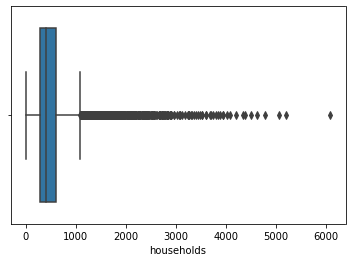

In [ ]:
sns.boxplot(x=housing_df['households'])

<AxesSubplot:xlabel='population'>

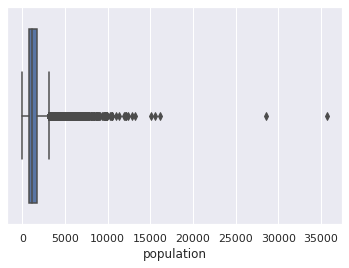

In [ ]:
sns.boxplot(x=df['population'])

<AxesSubplot:xlabel='households', ylabel='count'>

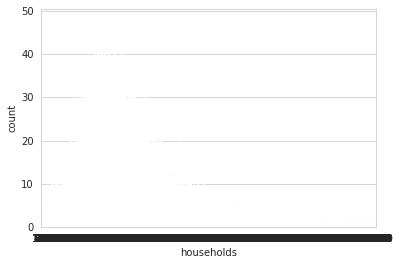

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='households',data=housing_df)


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households'>

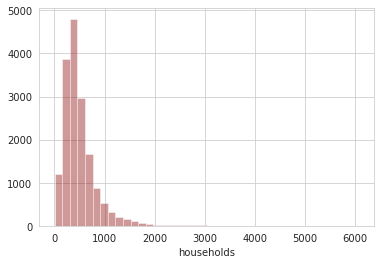

In [ ]:
sns.distplot(housing_df['households'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='median_house_value', ylabel='count'>

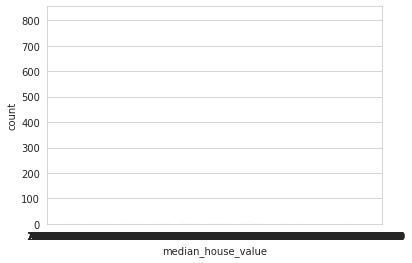

In [ ]:
sns.countplot(x='median_house_value',data=housing_df)

<AxesSubplot:>

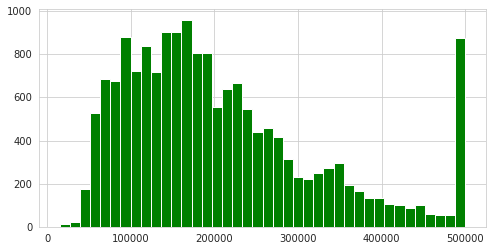

In [ ]:
housing_df['median_house_value'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='households', ylabel='median_income'>

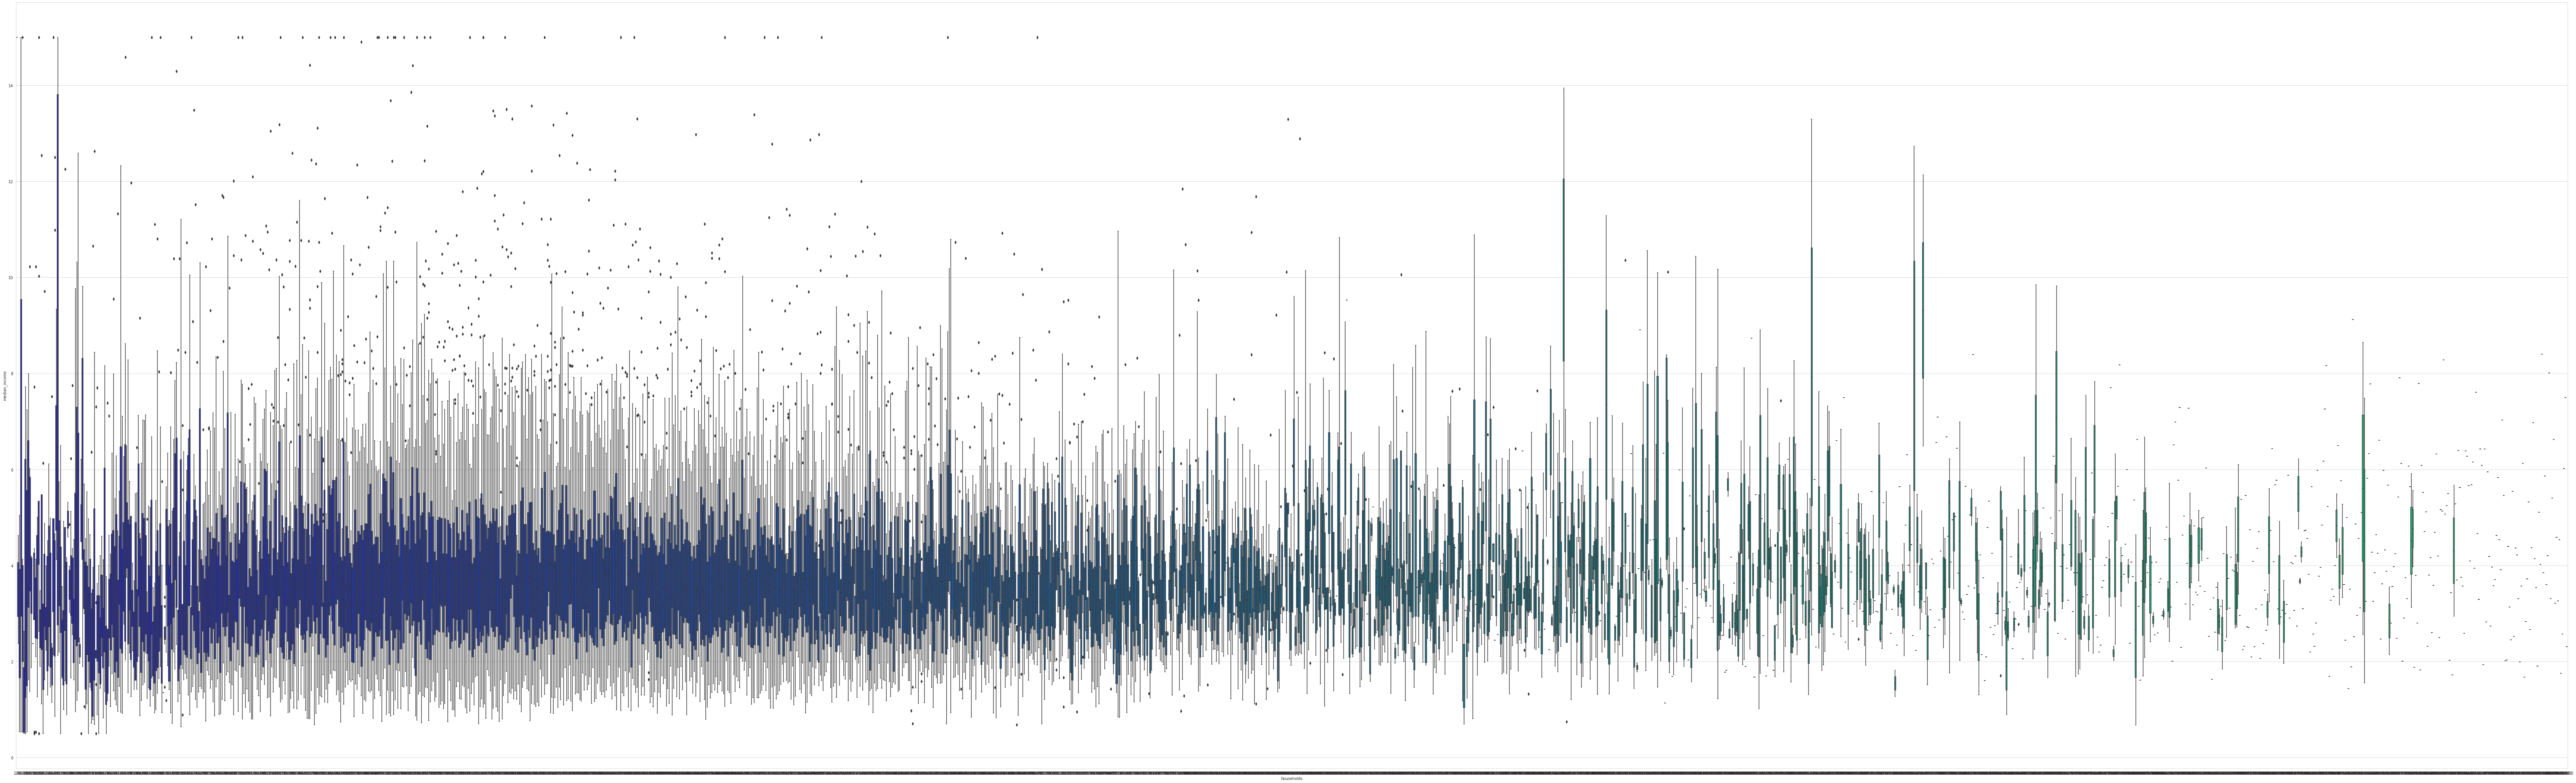

In [ ]:
plt.figure(figsize=(120,37))
sns.boxplot(x='households',y='median_income',data=housing_df,palette='winter')

<AxesSubplot:>

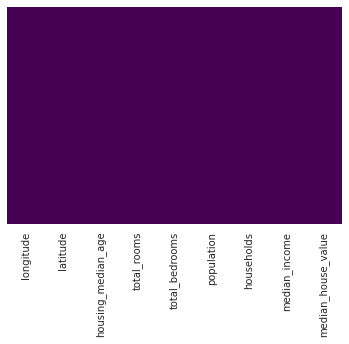

In [ ]:
sns.heatmap(housing_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
